In [1]:
import pandas as pd 

import numpy as np 

import matplotlib.pyplot as plt

from datetime import datetime, timedelta 

from statsmodels.tsa.stattools import acf , pacf 
from statsmodels.tsa.arima.model import ARIMA 
from time import time 

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')


In [3]:
stocks = pd.read_csv('tcs_stock_data.csv' ) 

In [4]:
stocks.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,5-July-2024,4014.95,4026.80,3988.00,4012.45,4008.664963,305014,31429,1.222699e+09,46507.0,15.25,38.8,-2.50
1,4-July-2024,4004.95,4047.75,3979.35,4021.25,4025.592937,56861,8076,2.288992e+08,21322.0,37.50,68.4,16.30
2,3-July-2024,4020.00,4020.85,3954.45,3964.85,3971.982342,40378,4893,1.603807e+08,18527.0,45.88,66.4,-55.15
3,2-July-2024,3990.00,4022.00,3984.00,4016.00,4004.966071,50665,6577,2.029116e+08,19478.0,38.44,38.0,26.00
4,1-July-2024,3904.00,4000.95,3886.05,3973.40,3969.453895,155437,17792,6.170000e+08,94108.0,60.54,114.9,69.40


In [5]:
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.set_index('Date', inplace=True)

In [6]:
duplicates = stocks[stocks.index.duplicated(keep=False)]

In [7]:
stocks_unique = stocks[~stocks.index.duplicated(keep='first')]

print(stocks_unique)

            Open Price  High Price  Low Price  Close Price          WAP  \
Date                                                                      
2024-07-05     4014.95     4026.80    3988.00      4012.45  4008.664963   
2024-07-04     4004.95     4047.75    3979.35      4021.25  4025.592937   
2024-07-03     4020.00     4020.85    3954.45      3964.85  3971.982342   
2024-07-02     3990.00     4022.00    3984.00      4016.00  4004.966071   
2024-07-01     3904.00     4000.95    3886.05      3973.40  3969.453895   
...                ...         ...        ...          ...          ...   
2004-08-31      989.00      990.00     976.00       987.95   982.258276   
2004-08-30      967.70      989.75     965.00       986.25   982.607932   
2004-08-27      982.45      982.45     958.55       962.35   969.424008   
2004-08-26      992.70      996.70     975.30       978.55   985.243466   
2004-08-25     1076.00     1080.00     979.00       987.50  1004.163872   

            No.of Shares

In [8]:
duplicates = stocks_unique[stocks_unique.index.duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Open Price, High Price, Low Price, Close Price, WAP, No.of Shares, No. of Trades, Total Turnover (Rs.), Deliverable Quantity, % Deli. Qty to Traded Qty, Spread High-Low, Spread Close-Open]
Index: []


In [9]:
stocks_unique.head()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2024-07-05,4014.95,4026.80,3988.00,4012.45,4008.664963,305014,31429,1.222699e+09,46507.0,15.25,38.8,-2.50
2024-07-04,4004.95,4047.75,3979.35,4021.25,4025.592937,56861,8076,2.288992e+08,21322.0,37.50,68.4,16.30
2024-07-03,4020.00,4020.85,3954.45,3964.85,3971.982342,40378,4893,1.603807e+08,18527.0,45.88,66.4,-55.15
2024-07-02,3990.00,4022.00,3984.00,4016.00,4004.966071,50665,6577,2.029116e+08,19478.0,38.44,38.0,26.00
2024-07-01,3904.00,4000.95,3886.05,3973.40,3969.453895,155437,17792,6.170000e+08,94108.0,60.54,114.9,69.40


In [10]:
stocks_unique = stocks_unique[::-1]

In [11]:
stocks_unique.head()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2004-08-25,1076.00,1080.00,979.00,987.50,1004.163872,6536309,121534,6.563525e+09,1858962.0,28.44,101.00,-88.50
2004-08-26,992.70,996.70,975.30,978.55,985.243466,2243016,44222,2.209917e+09,497612.0,22.18,21.40,-14.15
2004-08-27,982.45,982.45,958.55,962.35,969.424008,1503317,31798,1.457352e+09,263508.0,17.53,23.90,-20.10
2004-08-30,967.70,989.75,965.00,986.25,982.607932,1124819,23698,1.105256e+09,220874.0,19.64,24.75,18.55
2004-08-31,989.00,990.00,976.00,987.95,982.258276,1135066,19871,1.114928e+09,282277.0,24.87,14.00,-1.05


In [12]:
stocks_unique.drop(columns=['Open Price','Low Price', 'High Price', 'WAP','No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)','Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low','Spread Close-Open'] , inplace=True)

In [13]:
stocks_unique.head()

,Close Price
Date,
2004-08-25,987.50
2004-08-26,978.55
2004-08-27,962.35
2004-08-30,986.25
2004-08-31,987.95


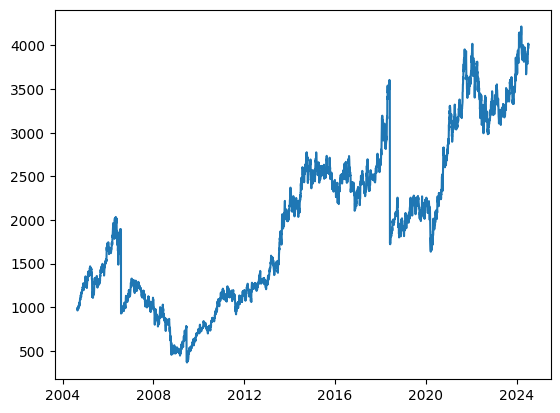

In [14]:
plt.plot(stocks_unique)

In [15]:
stocks_uniques = stocks_unique.asfreq(pd.infer_freq(stocks_unique.index))

In [16]:
stocks_uniques = stocks_uniques.ffill()

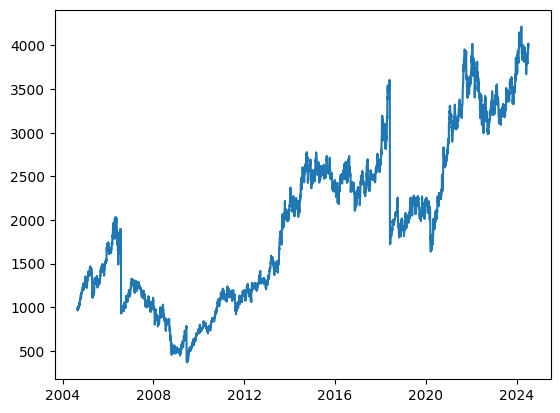

In [17]:
plt.plot(stocks_uniques['Close Price'])

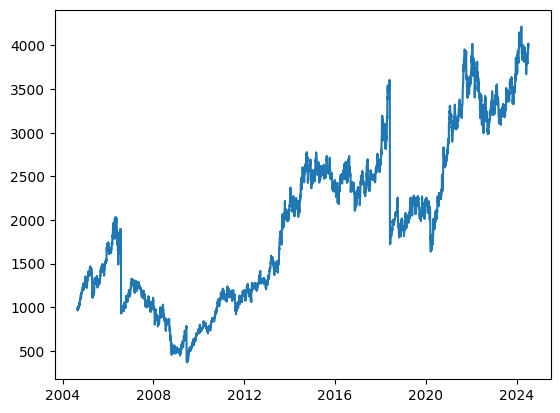

In [18]:
plt.plot(stocks_uniques['Close Price'])

In [19]:
first_diff = stocks_uniques.diff()[1:]

In [20]:
from statsmodels.tsa.stattools import adfuller 

def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistics' , result[0])
    print('p-value' , result[1])

In [21]:
# Check for missing values and sum them up
missing_values_count = stocks_uniques.isna().sum()

print(missing_values_count)


Close Price    0
dtype: int64


In [22]:
perform_adf_test(stocks_uniques['Close Price'])

ADF Statistics -1.1012956023500742
p-value 0.7145549574416928


In [23]:
perform_adf_test(first_diff['Close Price'])

ADF Statistics -61.10053467851515
p-value 0.0


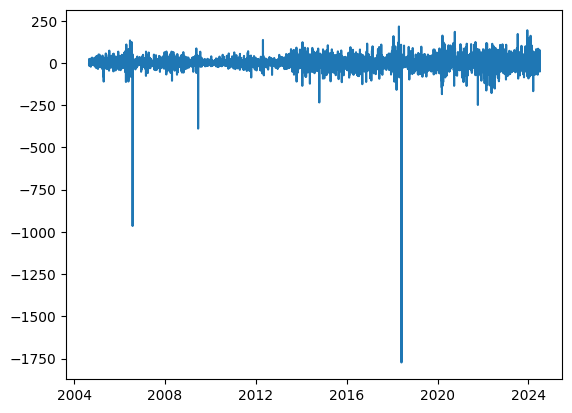

In [24]:
plt.plot(first_diff['Close Price'])

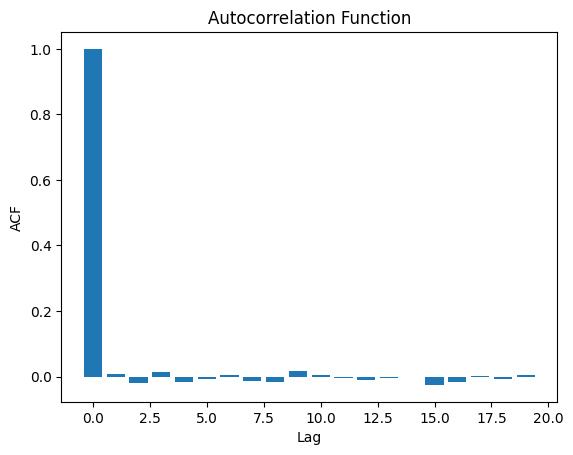

In [25]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

# Compute the ACF values
acf_vals = acf(first_diff['Close Price'])

# Define the number of lags
num_lags = 20

# Ensure num_lags does not exceed the length of acf_vals
num_lags = min(num_lags, len(acf_vals))

# Plot the ACF values
plt.bar(range(num_lags), acf_vals[:num_lags])
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')
plt.show()

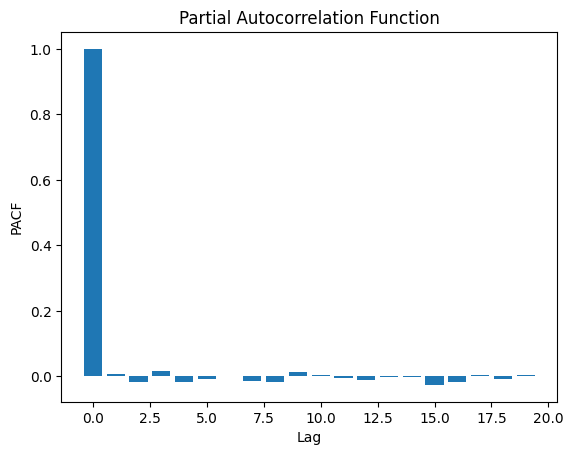

In [26]:
pacf_vals = pacf(first_diff['Close Price'])

# Define the number of lags
num_lags = 20

# Ensure num_lags does not exceed the length of acf_vals
num_lags = min(num_lags, len(pacf_vals))

# Plot the ACF values
plt.bar(range(num_lags), pacf_vals[:num_lags])
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.show()

In [27]:
train_end = datetime(2023,12,28)
test_end = datetime(2024, 7,8)

train_data = first_diff[:train_end]
test_data = first_diff[train_end + timedelta(days=3):test_end]

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [32]:
my_order = (0,1,1)

my_seasonal_order = (0,1,1,30)

model = SARIMAX(train_data , order = my_order , seasonal_order=my_seasonal_order)

In [33]:
start = time()
model_fit = model.fit()

end = time()

print(end - start)

86.12875080108643


In [34]:
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        Close Price   No. Observations:                 7064
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 30)   Log Likelihood              -35293.987
Date:                            Mon, 08 Jul 2024   AIC                          70593.975
Time:                                    17:46:56   BIC                          70614.550
Sample:                                08-26-2004   HQIC                         70601.063
                                     - 12-28-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9996      0.003   -384.960      0.000      -1.005      -0.995
ma.S.L30      -0.9933      0.003   

In [35]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
predictions_aligned = predictions.reindex(test_data.index)

# Compute residuals
residuals = test_data['Close Price'] - predictions_aligned

# Print the results to debug
print("Test Data:")
print(test_data)
print("\nPredictions:")
print(predictions_aligned)
print("\nResiduals:")
print(residuals)

Test Data:
            Close Price
Date                   
2023-12-31         0.00
2024-01-01        15.65
2024-01-02       -27.35
2024-01-03       -91.70
2024-01-04       -24.55
...                 ...
2024-07-01        68.45
2024-07-02        42.60
2024-07-03       -51.15
2024-07-04        56.40
2024-07-05        -8.80

[188 rows x 1 columns]

Predictions:
Date
2023-12-31   -6.755929
2024-01-01    4.012053
2024-01-02   -2.469578
2024-01-03    4.091102
2024-01-04    0.974607
                ...   
2024-07-01    4.111807
2024-07-02    0.995312
2024-07-03    3.925175
2024-07-04    1.011861
2024-07-05    1.094081
Freq: D, Name: predicted_mean, Length: 188, dtype: float64

Residuals:
Date
2023-12-31     6.755929
2024-01-01    11.637947
2024-01-02   -24.880422
2024-01-03   -95.791102
2024-01-04   -25.524607
                ...    
2024-07-01    64.338193
2024-07-02    41.604688
2024-07-03   -55.075175
2024-07-04    55.388139
2024-07-05    -9.894081
Freq: D, Length: 188, dtype: float64


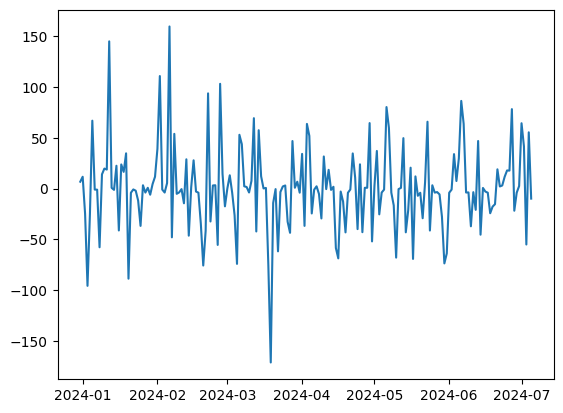

In [36]:
plt.plot(residuals)

In [37]:
end_date = datetime(2024,7,8)
start_date = datetime(2004,8,25)

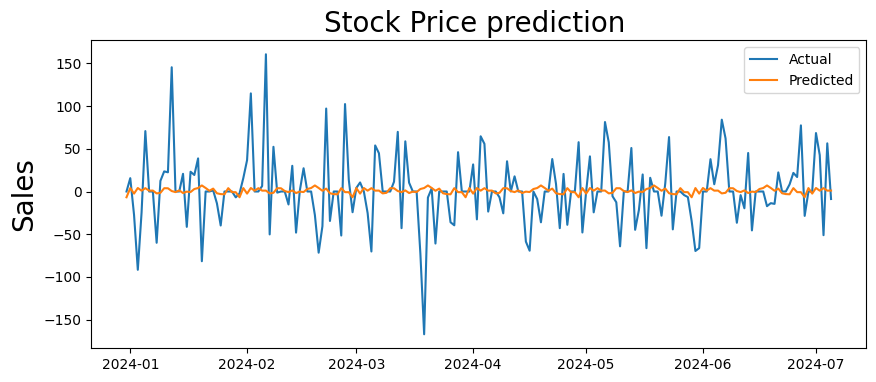

In [38]:
plt.figure(figsize=(10,4))

# plt.plot(train_data)

plt.plot(test_data, label='Actual')

plt.plot(predictions_aligned, label='Predicted')

plt.title('Stock Price prediction ' , fontsize = 20)

plt.ylabel('Sales' , fontsize = 20)

plt.legend()



In [39]:
print(np.mean(abs(test_data['Close Price']/predictions_aligned)))

22.943737537125976


In [40]:
print(np.sqrt(np.mean(residuals**2)))

41.31034870418497


In [41]:
mae = np.mean(abs(test_data['Close Price'] - predictions_aligned))
print(f'MAE: {mae}')


MAE: 27.586960180335698


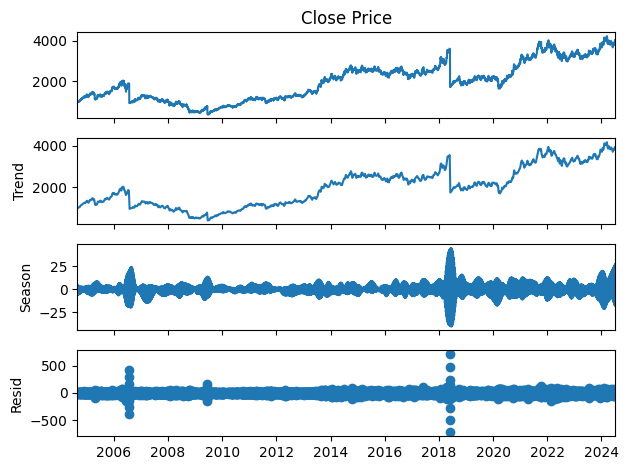

            Close Price  Deseasonalized
Date                                   
2004-08-25       987.50        5.675751
2004-08-26       978.55       -1.550863
2004-08-27       962.35      -14.223245
2004-08-28       962.35      -12.352518
2004-08-29       962.35      -10.345141
2004-08-30       986.25        5.481624
2004-08-31       987.95        2.158635
2004-09-01       987.80       -3.959614
2004-09-02       993.45       -0.115958
2004-09-03       997.95        5.360586
2004-09-04       997.95        6.592438
2004-09-05       997.95        9.155324
2004-09-06       995.00        0.415917
2004-09-07       995.35       -0.341215
2004-09-08       993.50       -2.095498
2004-09-09       980.00      -13.392106
2004-09-10       988.75       -2.659963
2004-09-11       988.75       -2.255493
2004-09-12       988.75       -2.455964
2004-09-13      1004.05        2.996035


In [43]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Seasonal decomposition using STL
stl = sm.tsa.STL(stocks_uniques['Close Price'], seasonal=31)
result = stl.fit()

# Plot the decomposed components
result.plot()
plt.show()

# The deseasonalized series is the residual component
stocks_uniques['Deseasonalized'] = result.resid

print(stocks_uniques.head(20))

In [44]:
model = SARIMAX(stocks_uniques['Close Price'], 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 31),  # Seasonal parameter set to 31 for monthly seasonality
                enforce_stationarity=False,
                enforce_invertibility=False)
fitted_model = model.fit()

# Forecast future values
forecast_steps = 30  # Number of steps to forecast
forecast = fitted_model.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean

print(forecast_mean)


2024-07-06    4015.525556
2024-07-07    4012.063131
2024-07-08    4011.103277
2024-07-09    4010.739598
2024-07-10    4005.141246
2024-07-11    4001.760709
2024-07-12    4004.624216
2024-07-13    4006.962399
2024-07-14    4008.623427
2024-07-15    4008.512690
2024-07-16    4011.999790
2024-07-17    4010.606968
2024-07-18    4011.860258
2024-07-19    4017.025620
2024-07-20    4017.188775
2024-07-21    4014.839662
2024-07-22    4016.658427
2024-07-23    4021.022055
2024-07-24    4018.368409
2024-07-25    4014.511312
2024-07-26    4014.817585
2024-07-27    4013.785557
2024-07-28    4010.872235
2024-07-29    4011.360224
2024-07-30    4009.317962
2024-07-31    4013.389866
2024-08-01    4015.873181
2024-08-02    4015.193260
2024-08-03    4018.389546
2024-08-04    4019.444195
Freq: D, Name: predicted_mean, dtype: float64


In [59]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

predictions = fitted_model.predict(start=pred_start_date, end=pred_end_date)
predictions_aligned = predictions.reindex(test_data.index)

# Compute residuals
residuals = test_data['Close Price'] - predictions_aligned

# Print the results to debug
print("Test Data:")
print(test_data)
print("\nPredictions:")
print(predictions_aligned)
print("\nResiduals:")
print(residuals)

Test Data:
            Close Price
Date                   
2023-12-31         0.00
2024-01-01        15.65
2024-01-02       -27.35
2024-01-03       -91.70
2024-01-04       -24.55
...                 ...
2024-07-01        68.45
2024-07-02        42.60
2024-07-03       -51.15
2024-07-04        56.40
2024-07-05        -8.80

[188 rows x 1 columns]

Predictions:
Date
2023-12-31    3796.181500
2024-01-01    3798.934948
2024-01-02    3813.932560
2024-01-03    3779.647169
2024-01-04    3689.803007
                 ...     
2024-07-01    3907.512062
2024-07-02    3974.612673
2024-07-03    4018.220320
2024-07-04    3965.580123
2024-07-05    4026.744284
Freq: D, Name: predicted_mean, Length: 188, dtype: float64

Residuals:
Date
2023-12-31   -3796.181500
2024-01-01   -3783.284948
2024-01-02   -3841.282560
2024-01-03   -3871.347169
2024-01-04   -3714.353007
                 ...     
2024-07-01   -3839.062062
2024-07-02   -3932.012673
2024-07-03   -4069.370320
2024-07-04   -3909.180123
2024-07-05  

In [51]:


# Slice the DataFrame to get the range
selected_range = stocks_uniques[pred_start_date:pred_end_date]


In [57]:
selected_range.head()

,Close Price,Deseasonalized
Date,,
2023-12-31,3794.95,8.004815
2024-01-01,3810.60,47.986279
2024-01-02,3783.25,35.582596
2024-01-03,3691.55,-36.410254
2024-01-04,3667.00,-59.139050


In [58]:
selected_range.tail()

,Close Price,Deseasonalized
Date,,
2024-07-01,3973.40,14.311326
2024-07-02,4016.00,54.600429
2024-07-03,3964.85,11.069009
2024-07-04,4021.25,33.375732
2024-07-05,4012.45,55.858335


C:\Users\user\AppData\Local\Temp\ipykernel_23656\1940210768.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


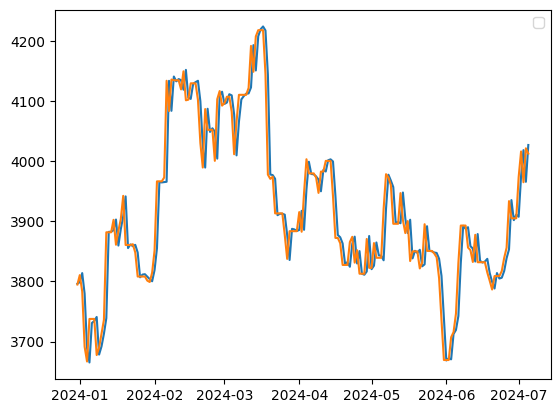

In [64]:
plt.plot(predictions_aligned)
plt.plot(selected_range['Close Price'])
plt.legend()

In [70]:
datafr = pd.DataFrame(predictions_aligned)
datafr

,predicted_mean
Date,
2023-12-31,3796.181500
2024-01-01,3798.934948
2024-01-02,3813.932560
2024-01-03,3779.647169
2024-01-04,3689.803007
...,...
2024-07-01,3907.512062
2024-07-02,3974.612673
2024-07-03,4018.220320


In [75]:
selected_range

,Close Price,Deseasonalized
Date,,
2023-12-31,3794.95,8.004815
2024-01-01,3810.60,47.986279
2024-01-02,3783.25,35.582596
2024-01-03,3691.55,-36.410254
2024-01-04,3667.00,-59.139050
...,...,...
2024-07-01,3973.40,14.311326
2024-07-02,4016.00,54.600429
2024-07-03,3964.85,11.069009


In [76]:
print(np.mean(abs(test_data['Close Price']/datafr['predicted_mean'])))

mae = np.mean(abs(test_data['Close Price'] - datafr))
print(f'MAE: {mae}')

print(np.sqrt(np.mean(residuals**2)))

0.006812690786711693
MAE: nan
3919.3336060132697
